# Importing libraries and the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "creditcard.csv"

creditcard = pd.read_csv(url)

creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data processing and visualization

In [2]:

print(creditcard.shape)

(284807, 31)


In [3]:
print(creditcard.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:

creditcard["Class"].value_counts()


0    284315
1       492
Name: Class, dtype: int64

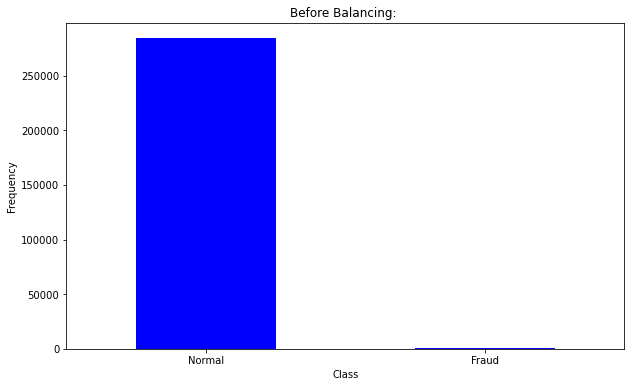

In [5]:
count_classes = pd.value_counts(creditcard['Class'], sort=True)
count_classes.plot(kind='bar', rot=0,color ='b',figsize = (10, 6))
plt.title("Before Balancing: ")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


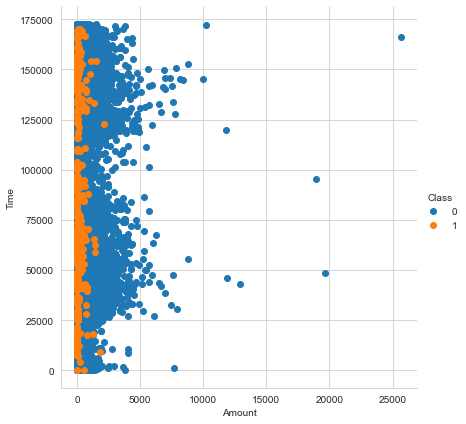

we see 


In [6]:
sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", size = 6).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()
print("we see ")

we see that all fraud transaction is of amount less than 2500


C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


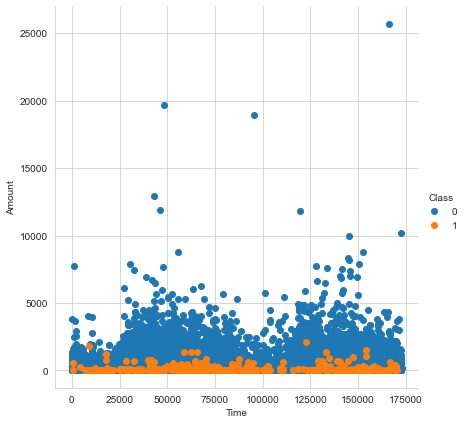

In [7]:

sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

We cannot find a definite pattern on basis of time to predict if the transaction during a particular period is fraud or not

In [8]:
fraud = creditcard[creditcard['Class']==1]
normal = creditcard[creditcard['Class']==0]

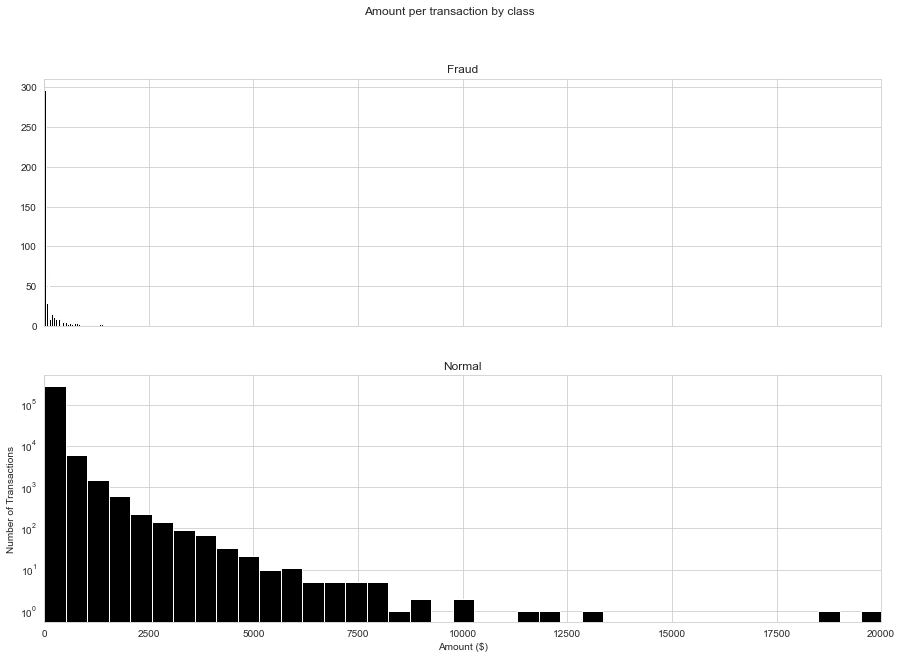

In [9]:

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize = (15, 10))
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins,facecolor="black")
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins,facecolor="black")
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();


We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount

In [10]:
FilteredData = creditcard[['Time','Amount', 'Class']]

In [11]:
FilteredData

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
...,...,...,...
284802,172786.0,0.77,0
284803,172787.0,24.79,0
284804,172788.0,67.88,0
284805,172788.0,10.00,0


In [12]:

FilteredData["Class"].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [13]:
countLess = 0
countMore= 0
for i in range(284806):
    if(FilteredData.iloc[i]["Amount"] < 2500):
        countLess = countLess + 1
    else:
        countMore = countMore + 1
print("The no. of transaction having transaction amount less than 2500",countLess)
print("The no. of transaction having transaction amount more than 2500",countMore)

The no. of transaction having transaction amount less than 2500 284357
The no. of transaction having transaction amount more than 2500 449


In [14]:
percentage = (countLess/284807)*100
percentage

99.84199826549207

In [15]:
class0 = 0
class1 = 0
for i in range(284806):
    if(FilteredData.iloc[i]["Amount"] < 2500):
        if(FilteredData.iloc[i]["Class"] == 0):
            class0 = class0 + 1
        else:
            class1 = class1 + 1
        
print("The no. of transaction less than 2500 and is genuine",class0)
print("The no. of transaction less than 2500 and is fraud",class1)

The no. of transaction less than 2500 and is genuine 283865
The no. of transaction less than 2500 and is fraud 492


In [16]:

FilteredData["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Observations:

Now the total number of fraud transactions in whole data are 492. It has been calculated that total number of fraud transactions in data where transaction amount is less than 2500 is also 492. Therefore, all 100% fraud transactions have transaction amount less than 2500 and there is no fraud transaction where transaction amount is more than 2500.


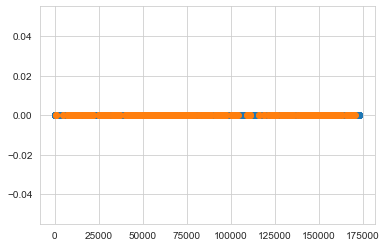

fraud transaction varies through time,so cant get a pattern for fraud transaction on the basis of time


In [17]:
creditCard_genuine = FilteredData.loc[FilteredData["Class"] == 0]
creditCard_fraud = FilteredData.loc[FilteredData["Class"] == 1]

plt.plot(creditCard_genuine["Time"], np.zeros_like(creditCard_genuine["Time"]), "o")
plt.plot(creditCard_fraud["Time"], np.zeros_like(creditCard_fraud["Time"]), "o")

plt.show()

#X-axis: Time
print("fraud transaction varies through time,so cant get a pattern for fraud transaction on the basis of time")

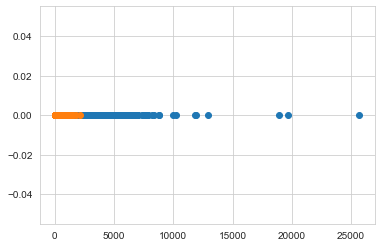

In [18]:

plt.plot(creditCard_genuine["Amount"], np.zeros_like(creditCard_genuine["Amount"]), "o")
plt.plot(creditCard_fraud["Amount"], np.zeros_like(creditCard_fraud["Amount"]), "o")

plt.show()
#X-axis: Amount

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


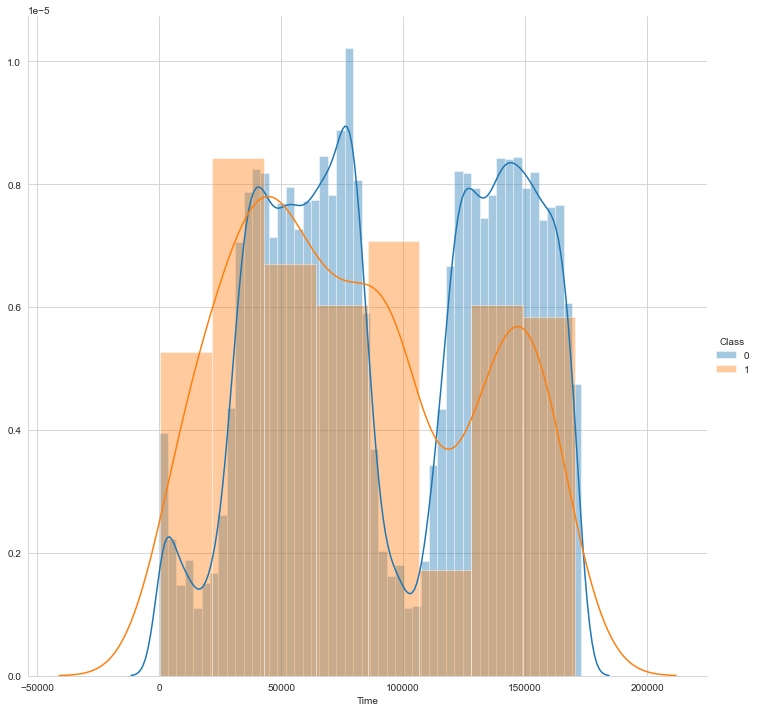

In [19]:

sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Time").add_legend()
plt.show()

Observations:

There is a heavy overlap of genuine and fraud transactions throughout the time and there is no clear distinction.

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


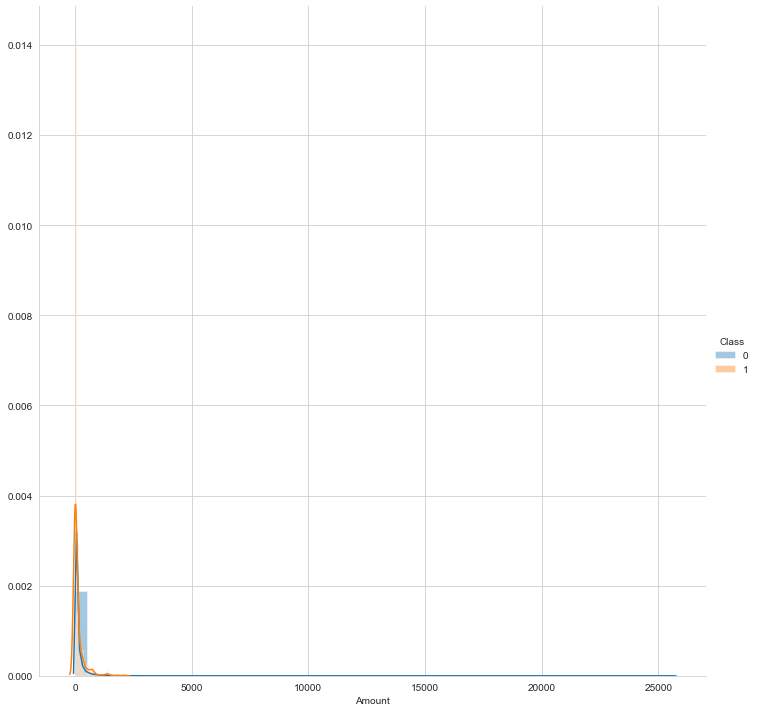

In [20]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Amount").add_legend()
plt.show()

pdf =  [9.98553406e-01 1.26401388e-03 1.26401388e-04 3.51114966e-05
 7.02229931e-06 3.51114966e-06 0.00000000e+00 7.02229931e-06
 0.00000000e+00 3.51114966e-06]


Counts = [3.88675874e-04 4.92003427e-07 4.92003427e-08 1.36667619e-08
 2.73335237e-09 1.36667619e-09 0.00000000e+00 2.73335237e-09
 0.00000000e+00 1.36667619e-09]


Bin edges =  [    0.     2569.116  5138.232  7707.348 10276.464 12845.58  15414.696
 17983.812 20552.928 23122.044 25691.16 ]


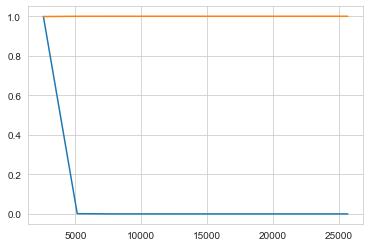

In [21]:

counts, bin_edges = np.histogram(FilteredData['Amount'], bins=10, density = True)
pdf = counts/(sum(counts))

print("pdf = ",pdf)
print("\n")
print("Counts =",counts)
print("\n")
print("Bin edges = ",bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

# mean standard deviation and median of genuine and fraud transaction

In [22]:
print("Means:")
print("Mean of transaction amount of genuine transactions: ",np.mean(creditCard_genuine["Amount"]))
print("Mean of transaction amount of fraud transactions: ",np.mean(creditCard_fraud["Amount"]))

Means:
Mean of transaction amount of genuine transactions:  88.29102242225574
Mean of transaction amount of fraud transactions:  122.21132113821133


In [23]:
print("Standard Deviation:")
print("Std-Deviation of transaction amount of genuine transactions: ", np.std(creditCard_genuine["Amount"]))
print("Std-Deviation of transaction amount of fraud transactions: ", np.std(creditCard_fraud["Amount"]))

Standard Deviation:
Std-Deviation of transaction amount of genuine transactions:  250.1046523874637
Std-Deviation of transaction amount of fraud transactions:  256.42229861324483


In [24]:
print("Median:")
print("Median of transaction amount of genuine transactions: ", np.median(creditCard_genuine["Amount"]))
print("Median of transaction amount of fraud transactions: ", np.median(creditCard_fraud["Amount"]))

Median:
Median of transaction amount of genuine transactions:  22.0
Median of transaction amount of fraud transactions:  9.25


In [25]:
print("\nQuantiles:")
print(np.percentile(creditCard_genuine["Amount"],np.arange(0, 100, 25)))
print(np.percentile(creditCard_fraud["Amount"],np.arange(0, 100, 25)))


Quantiles:
[ 0.    5.65 22.   77.05]
[  0.     1.     9.25 105.89]


# histograms to see how the behaviour of different feature changes with transactions

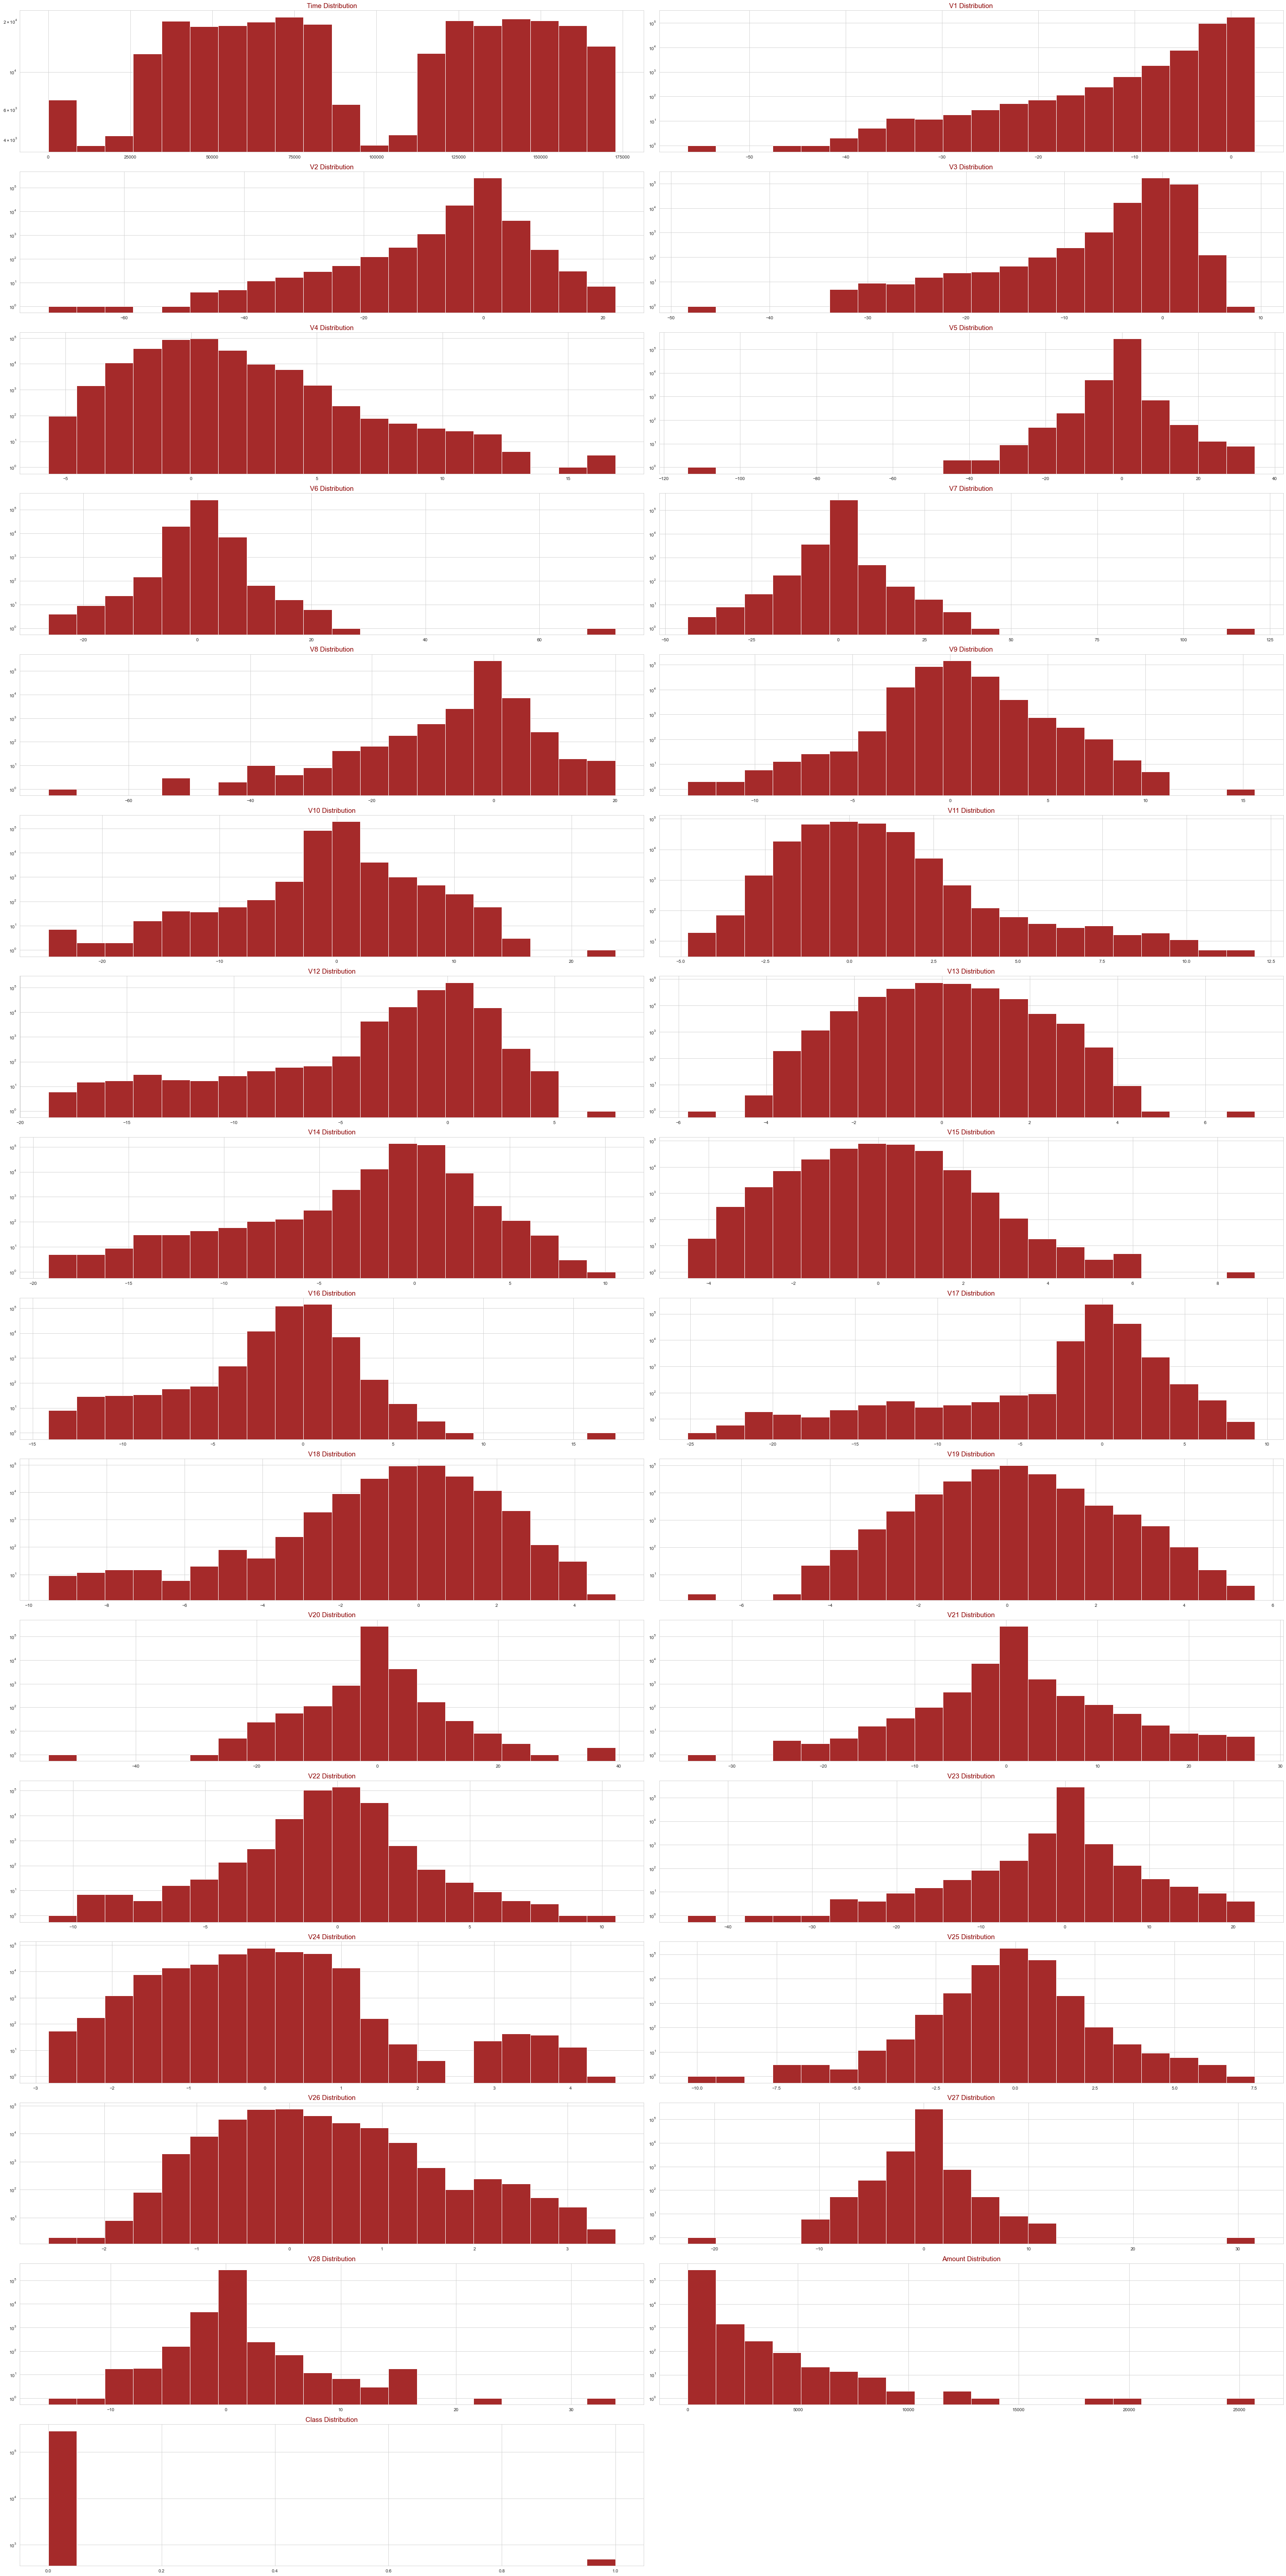

In [26]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(40,80))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='brown')
        ax.set_title(feature+" Distribution",color='DarkRed',fontsize=15)
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(creditcard,creditcard.columns,16,2)

# Breaking the dataset into training and testing


In [27]:
X = creditcard.drop(labels='Class', axis=1)
Y = creditcard['Class']

X.shape, Y.shape

((284807, 30), (284807,))

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(199364, 30) (199364,)
(85443, 30) (85443,)


# Logistic Regression on unbalanced data

In [30]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
# Training the algorithm
logmodel.fit(xtrain,ytrain)
predictions = logmodel.predict(xtest)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)

[1 0 0 ... 0 0 0]
[0 1]
[85304   139]


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:

from sklearn.metrics import classification_report
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.61      0.62      0.62       136

    accuracy                           1.00     85443
   macro avg       0.81      0.81      0.81     85443
weighted avg       1.00      1.00      1.00     85443



In [32]:

# Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [33]:
tn, fp, fn, tp = confusion_matrix(ytest,predictions ).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,85,51
Not Fraud,54,85253


<AxesSubplot:>

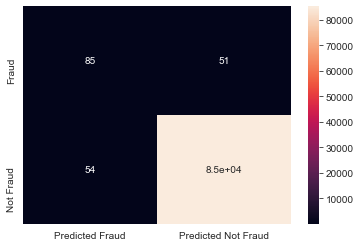

In [34]:
sns.heatmap(conf_matrix, annot=True)

In [35]:
lr_accuracy = accuracy_score(ytest, predictions)
lr_accuracy

0.9987711105649381

we see that our accuracy is high but accuracy takes into account the whole confusion matrix. So we can say that this measure is not suitable.

Let's look at precision and recall.

In [36]:
lr_precision = precision_score(ytest, predictions)
lr_precision

0.6115107913669064

In [37]:
lr_recall = recall_score(ytest, predictions)
lr_recall

0.625

In [38]:

from sklearn.metrics import f1_score

In [39]:

lr_f1 = f1_score(ytest, predictions)
lr_f1


0.6181818181818182

In [40]:
results_testset = pd.DataFrame([['Logistic Regression', lr_accuracy,1-lr_recall ,lr_recall, lr_precision,lr_f1  ]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset





,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Logistic Regression,0.998771,0.375,0.625,0.611511,0.618182


Now, for the ROC Curve, we need the probabilites of Fraud happening (which is the probability of occurance of 1)

In [41]:
lr_pred_test_prob = logmodel.predict_proba(xtest)[:, 1]

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

In [43]:
fpr, tpr, threshold = roc_curve(ytest, lr_pred_test_prob)

In [44]:

lr_auc = roc_auc_score(ytest, lr_pred_test_prob)
lr_auc

0.9229404317554797

In [45]:

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

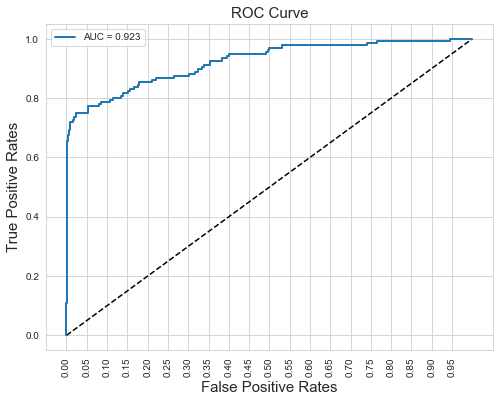

In [46]:

plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

# Random Forest on unbalanced dataset

In [47]:
from sklearn.ensemble  import RandomForestClassifier
logmodel = RandomForestClassifier()
logmodel.fit(xtrain,ytrain)

RandomForestClassifier()

In [48]:
predictions = logmodel.predict(xtest)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)

[1 0 0 ... 0 0 0]
[0 1]
[85324   119]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.92      0.81      0.86       136

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [50]:
tn, fp, fn, tp = confusion_matrix(ytest,predictions ).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,110,26
Not Fraud,9,85298


<AxesSubplot:>

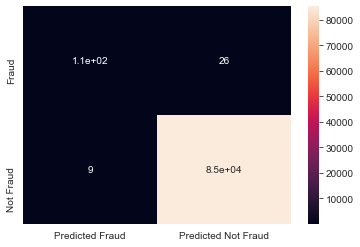

In [51]:
sns.heatmap(conf_matrix, annot=True)

In [52]:
rf_accuracy = accuracy_score(ytest, predictions)
rf_accuracy

0.9995903701883126

In [53]:
rf_precision = precision_score(ytest, predictions)
rf_precision

0.9243697478991597

In [54]:
rf_recall = recall_score(ytest, predictions)
rf_recall

0.8088235294117647

In [55]:

from sklearn.metrics import f1_score
rf_f1 = f1_score(ytest, predictions)
rf_f1

0.8627450980392157

In [56]:
results_testset = pd.DataFrame([['RandomForest', rf_accuracy,1-rf_recall ,rf_recall, rf_precision,rf_f1  ]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.99959,0.191176,0.808824,0.92437,0.862745


    We plot the for ROC Curve,for whhich we need the probabilites of Fraud happening (which is the probability of occurance of 1)

In [57]:
lr_pred_test_prob = logmodel.predict_proba(xtest)[:, 1]

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

In [59]:
fpr, tpr, threshold = roc_curve(ytest, lr_pred_test_prob)

In [60]:
lr_auc = roc_auc_score(ytest, lr_pred_test_prob)
lr_auc

0.9655004692394735

In [61]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

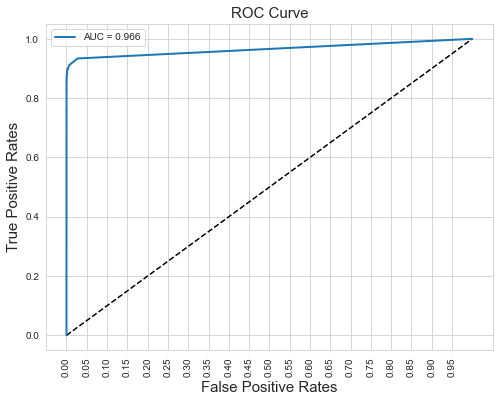

In [62]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

# Support Vector Machine on unbalanced dataset

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:

mms = MinMaxScaler()

In [65]:
X_scaled = mms.fit_transform(X)

In [66]:
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724


In [67]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X_scaled, Y, random_state=42, test_size=0.30, shuffle=True)

In [68]:

from sklearn.svm import SVC

In [69]:
svc_model = SVC(kernel='linear', probability=True)

In [70]:
svc_model.fit(xtrain, ytrain)

SVC(kernel='linear', probability=True)

In [71]:
svc_pred = svc_model.predict(xtest)
print (svc_pred)
import numpy as np
unique_elements, counts_elements = np.unique(svc_pred, return_counts=True)
print(unique_elements)
print(counts_elements)

[1 0 0 ... 0 0 0]
[0 1]
[85312   131]


In [72]:
from sklearn.metrics import classification_report
print(classification_report(ytest,svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.80      0.82       136

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [74]:
tn, fp, fn, tp = confusion_matrix(ytest,svc_pred ).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,109,27
Not Fraud,22,85285


<AxesSubplot:>

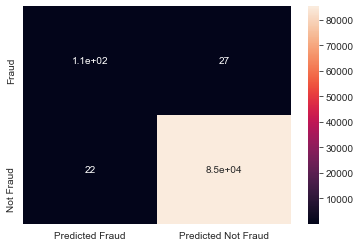

In [75]:
sns.heatmap(conf_matrix, annot=True)

In [76]:
svc_accuracy = accuracy_score(ytest, svc_pred)
svc_accuracy

0.9994265182636377

In [77]:
svc_precision = precision_score(ytest, svc_pred)
svc_precision

0.8320610687022901

In [78]:
svc_recall = recall_score(ytest, svc_pred)
svc_recall

0.8014705882352942

In [79]:

from sklearn.metrics import f1_score

In [80]:
svc_f1 = f1_score(ytest, svc_pred)
svc_f1

0.8164794007490637

In [81]:
results_testset = pd.DataFrame([['Support Vector Mchine', svc_accuracy,1-svc_recall ,svc_recall, svc_precision,svc_f1  ]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Support Vector Mchine,0.999427,0.198529,0.801471,0.832061,0.816479


In [82]:
svc_pred_prob = svc_model.predict_proba(xtest)[:, 1]

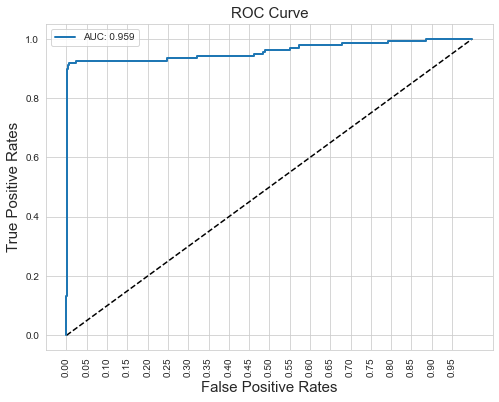

In [83]:
# First, getting the auc score
svc_auc = roc_auc_score(ytest, svc_pred_prob)

# Now, let's get the fpr and tpr
fpr, tpr, threshold = roc_curve(ytest, svc_pred_prob)

# Now, let's draw the curve
plot_roc_curve(fpr, tpr, 'AUC: %.3f' % svc_auc)

# Naive Bayes on Unbalanced dataset

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
nb = GaussianNB()

In [86]:
nb.fit(xtrain, ytrain)

GaussianNB()

In [87]:
predictions = nb.predict(xtest)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)

[1 0 0 ... 0 0 0]
[0 1]
[83473  1970]


In [88]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.85      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [90]:
tn, fp, fn, tp = confusion_matrix(ytest,predictions ).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,115,21
Not Fraud,1855,83452


<AxesSubplot:>

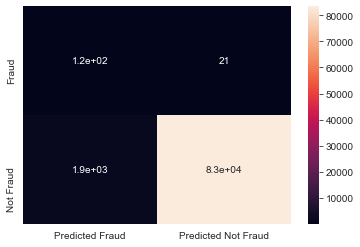

In [91]:
sns.heatmap(conf_matrix, annot=True)

In [92]:
nb_accuracy = accuracy_score(ytest, predictions)
nb_accuracy

0.9780438420935594

In [93]:
nb_precision = precision_score(ytest, predictions)
nb_precision

0.0583756345177665

In [94]:
nb_recall = recall_score(ytest, predictions)
nb_recall

0.8455882352941176

In [95]:

from sklearn.metrics import f1_score

In [96]:
nb_f1 = f1_score(ytest, predictions)
nb_f1

0.10921177587844254

In [97]:
results_testset = pd.DataFrame([['Naive Bayes', nb_accuracy,1-nb_recall ,nb_recall, nb_precision,nb_f1  ]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Naive Bayes,0.978044,0.154412,0.845588,0.058376,0.109212


In [98]:
nb_pred_test_prob = nb.predict_proba(xtest)[:, 1]

In [99]:
from sklearn.metrics import roc_curve, roc_auc_score

In [100]:
fpr, tpr, threshold = roc_curve(ytest, nb_pred_test_prob)

In [101]:
nb_auc = roc_auc_score(ytest, nb_pred_test_prob)
nb_auc

0.9690409689846844

In [102]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

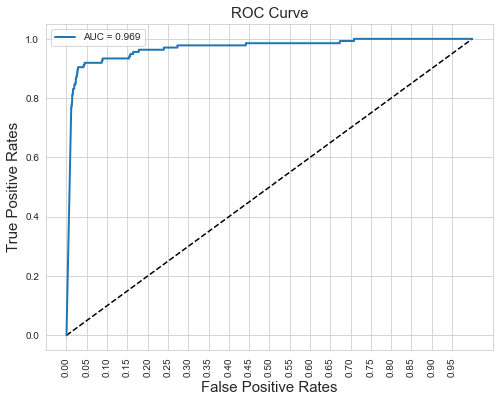

In [103]:

plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % nb_auc)

# Balancing the dataset using SMOTE

In [104]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [105]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
X_train_ns,y_train_ns=os.fit_resample(xtrain,ytrain)


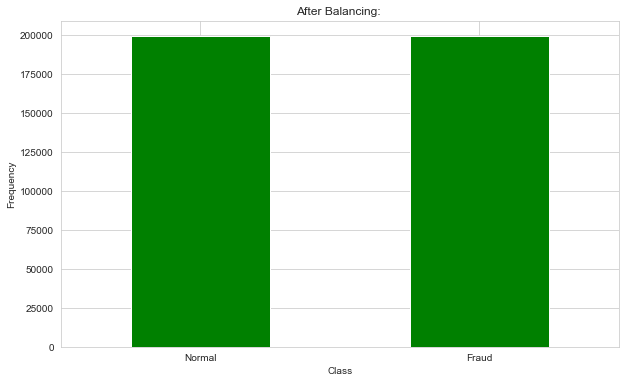

In [106]:
count_classes = pd.value_counts(y_train_ns, sort=True)
count_classes.plot(kind='bar', rot=0,color ='g',figsize = (10, 6))
plt.title("After Balancing: ")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [107]:
y_train_ns.value_counts()

0    199008
1    199008
Name: Class, dtype: int64

In [108]:
dataset=X_train_ns

In [109]:
dataset['Class']=y_train_ns

In [110]:

dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.012182,0.919397,0.762191,0.851600,0.176286,0.771251,0.246327,0.271107,0.779574,0.508360,...,0.558081,0.552703,0.678322,0.439229,0.595340,0.297794,0.423751,0.310125,0.000039,0
1,0.889520,0.952964,0.724374,0.778523,0.283138,0.766401,0.278401,0.274808,0.784991,0.463325,...,0.575233,0.505742,0.651530,0.269977,0.549912,0.531818,0.411152,0.315363,0.046486,0
2,0.563006,0.927548,0.761271,0.876666,0.209360,0.757554,0.278267,0.256722,0.795076,0.530334,...,0.553259,0.490206,0.661444,0.383598,0.604113,0.561932,0.415359,0.314911,0.002919,0
3,0.397171,0.978550,0.769143,0.839865,0.272305,0.765380,0.261892,0.264357,0.787056,0.460452,...,0.557603,0.475516,0.667168,0.331860,0.584950,0.446704,0.416198,0.313366,0.000077,0
4,0.069164,0.941926,0.774648,0.856429,0.183325,0.770226,0.268183,0.267388,0.788291,0.510383,...,0.556974,0.488097,0.663592,0.195089,0.564578,0.553733,0.422966,0.317511,0.001452,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398011,0.444883,0.953100,0.778717,0.825712,0.322413,0.774998,0.246598,0.267607,0.785488,0.459529,...,0.556163,0.472593,0.661562,0.393027,0.605724,0.352834,0.417198,0.315680,0.000039,1
398012,0.574502,0.606144,0.919906,0.457083,0.624889,0.669359,0.258639,0.102236,0.664293,0.146323,...,0.440376,0.676315,0.689440,0.444876,0.574104,0.352855,0.339023,0.301348,0.000154,1
398013,0.047447,0.938984,0.817989,0.722877,0.527195,0.770874,0.234007,0.253802,0.794999,0.351134,...,0.568982,0.487884,0.658206,0.348260,0.647903,0.499468,0.423940,0.320316,0.000039,1
398014,0.085577,0.853462,0.855018,0.563143,0.715456,0.736626,0.229539,0.194396,0.829234,0.260993,...,0.582801,0.521298,0.664520,0.227766,0.557679,0.533057,0.449191,0.322565,0.000039,1


In [111]:


x=dataset.drop("Class",axis=1)
y=dataset["Class"]
test_X=xtest
test_Y=ytest
test_Y.value_counts()

0    85307
1      136
Name: Class, dtype: int64

# Logistic Regression on balanced dataset

In [112]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
# Training the algorithm
logmodel.fit(x,y)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
predictions = logmodel.predict(test_X)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)

[1 0 0 ... 0 0 0]
[0 1]
[83335  2108]


In [114]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.91      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [115]:
 #Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [116]:
tn, fp, fn, tp = confusion_matrix(test_Y,predictions ).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,124,12
Not Fraud,1984,83323


<AxesSubplot:>

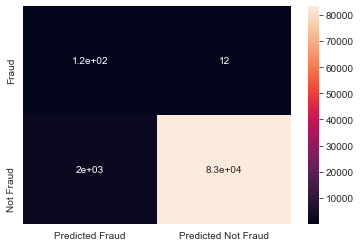

In [117]:
sns.heatmap(conf_matrix, annot=True)

In [118]:
lr_accuracy = accuracy_score(test_Y, predictions)
lr_accuracy

0.9766393970249172

In [119]:
lr_precision = precision_score(test_Y, predictions)
lr_precision

0.058823529411764705

In [120]:
lr_recall = recall_score(test_Y, predictions)
lr_recall

0.9117647058823529

In [121]:
from sklearn.metrics import f1_score
lr_f1 = f1_score(test_Y, predictions)
lr_f1

0.1105169340463458

In [122]:
results_testset = pd.DataFrame([['Logistic Regression', lr_accuracy,1-lr_recall ,lr_recall, lr_precision,lr_f1  ]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Logistic Regression,0.976639,0.088235,0.911765,0.058824,0.110517


In [123]:
lr_pred_test_prob = logmodel.predict_proba(test_X)[:, 1]

In [124]:
from sklearn.metrics import roc_curve, roc_auc_score

In [125]:
lr_auc = roc_auc_score(test_Y, lr_pred_test_prob)
lr_auc

0.9841120547999991

In [126]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

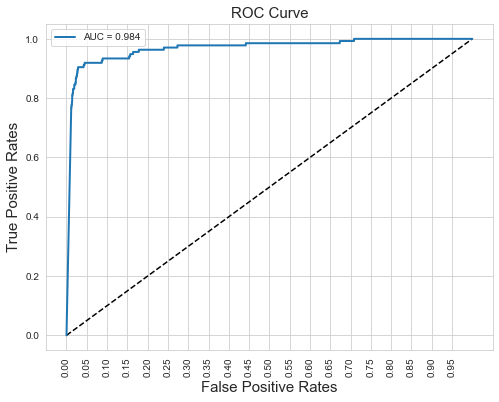

In [127]:

plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

# Random forest on SMOTE balaced dataset

In [128]:
from sklearn.ensemble  import RandomForestClassifier
logmodel = RandomForestClassifier()
#training the model
logmodel.fit(x,y)

RandomForestClassifier()

In [129]:
predictions = logmodel.predict(test_X)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)

[1 0 0 ... 0 0 0]
[0 1]
[85303   140]


In [130]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.84      0.87      0.86       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [131]:
 #Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [132]:
tn, fp, fn, tp = confusion_matrix(test_Y,predictions ).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,118,18
Not Fraud,22,85285


<AxesSubplot:>

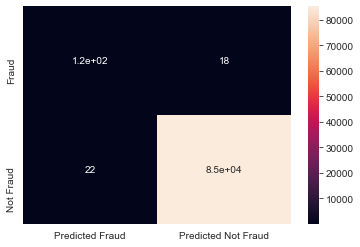

In [133]:
sns.heatmap(conf_matrix, annot=True)

In [134]:
rf_accuracy = accuracy_score(test_Y, predictions)
rf_accuracy

0.9995318516437859

In [135]:
rf_precision = precision_score(test_Y, predictions)
rf_precision

0.8428571428571429

In [136]:
rf_recall = recall_score(test_Y, predictions)
rf_recall

0.8676470588235294

In [137]:
from sklearn.metrics import f1_score
rf_f1 = f1_score(test_Y, predictions)
rf_f1

0.855072463768116

In [138]:
results_testset = pd.DataFrame([['RandomForest', rf_accuracy,1-rf_recall ,rf_recall, rf_precision,rf_f1  ]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999532,0.132353,0.867647,0.842857,0.855072


In [139]:
lr_pred_test_prob = logmodel.predict_proba(test_X)[:, 1]

In [140]:
from sklearn.metrics import roc_curve, roc_auc_score

In [141]:
lr_auc = roc_auc_score(ytest, lr_pred_test_prob)
lr_auc

0.9840931352437116

In [142]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

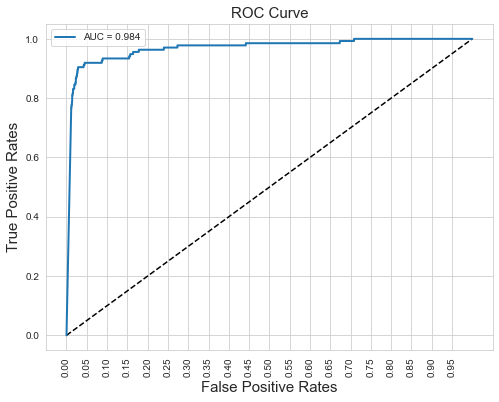

In [143]:

plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

# supoort vector on balanced dataset

In [144]:
from sklearn.preprocessing import MinMaxScaler

In [145]:

mms = MinMaxScaler()

In [146]:

from sklearn.svm import SVC

In [147]:
svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(x,y)

SVC(kernel='linear', probability=True)

In [149]:
predictions = svc_model.predict(test_X)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)

[1 0 0 ... 0 0 0]
[0 1]
[83201  2242]


In [150]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.93      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [151]:
 #Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [152]:
tn, fp, fn, tp = confusion_matrix(test_Y,predictions ).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,126,10
Not Fraud,2116,83191


<AxesSubplot:>

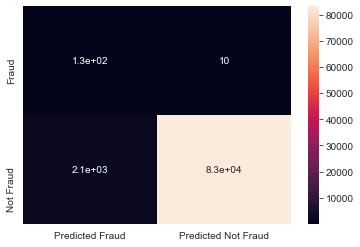

In [153]:
sns.heatmap(conf_matrix, annot=True)

In [154]:
svc_accuracy = accuracy_score(test_Y, predictions)
svc_accuracy

0.9751179148672214

In [155]:
svc_precision = precision_score(test_Y, predictions)
svc_precision

0.056199821587867974

In [156]:
svc_recall = recall_score(test_Y, predictions)
svc_recall

0.9264705882352942

In [157]:
from sklearn.metrics import f1_score
svc_f1 = f1_score(test_Y, predictions)
svc_f1

0.10597140454163163

In [158]:
results_testset = pd.DataFrame([['Support Vector ', svc_accuracy,1-svc_recall ,svc_recall, svc_precision,svc_f1  ]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Support Vector,0.975118,0.073529,0.926471,0.0562,0.105971


In [159]:
svc_pred_prob = svc_model.predict_proba(test_X)[:, 1]

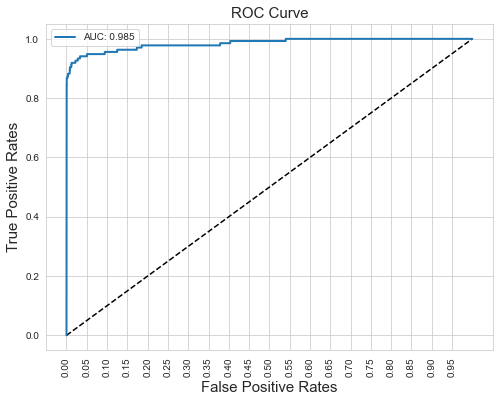

In [160]:
# First, getting the auc score
svc_auc = roc_auc_score(test_Y, svc_pred_prob)

# Now, let's get the fpr and tpr
fpr, tpr, threshold = roc_curve(test_Y, svc_pred_prob)

# Now, let's draw the curve
plot_roc_curve(fpr, tpr, 'AUC: %.3f' % svc_auc)

# Naive Bayes on Balanced Dateset

In [161]:
from sklearn.naive_bayes import GaussianNB

In [162]:
nb = GaussianNB()

In [163]:
nb.fit(x,y)

GaussianNB()

In [164]:
predictions = nb.predict(test_X)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)

[1 0 0 ... 0 0 0]
[0 1]
[83305  2138]


In [165]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.88      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [166]:
#Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [167]:
tn, fp, fn, tp = confusion_matrix(test_Y,predictions ).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,120,16
Not Fraud,2018,83289


<AxesSubplot:>

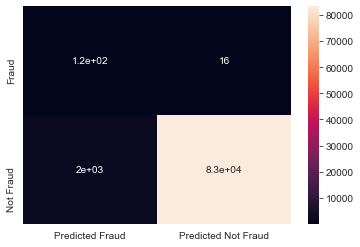

In [168]:
sns.heatmap(conf_matrix, annot=True)

In [169]:
nb_accuracy = accuracy_score(test_Y, predictions)
nb_accuracy

0.9761946560865138

In [170]:
nb_precision = precision_score(test_Y, predictions)
nb_precision

0.05612722170252572

In [171]:
nb_recall = recall_score(test_Y, predictions)
nb_recall

0.8823529411764706

In [172]:
from sklearn.metrics import f1_score
nb_f1 = f1_score(test_Y, predictions)
nb_f1

0.10554089709762533

In [173]:
results_testset = pd.DataFrame([['Naive Bayes ', nb_accuracy,1-nb_recall ,nb_recall, nb_precision,nb_f1  ]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Naive Bayes,0.976195,0.117647,0.882353,0.056127,0.105541


In [174]:
nb_pred_prob = nb.predict_proba(test_X)[:, 1]

In [175]:
from sklearn.metrics import roc_curve, roc_auc_score

In [177]:
nb_auc = roc_auc_score(ytest, lr_pred_test_prob)
nb_auc

0.9840931352437116

In [178]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

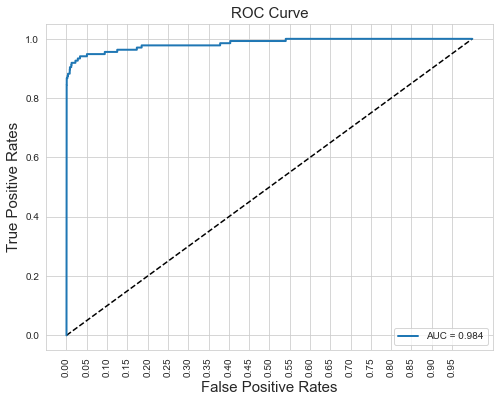

In [179]:

plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % nb_auc)